In [40]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scipy
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import glob
import os
%matplotlib inline

In [2]:
#pip install ipympl

In [3]:
samples = ['IN','PB2','SNPB','IN2BI','IN4BI', 'SN'] #superconducting
controls = ["PTFE", "Cu"] #non-superconducting

Meissner/2Vpp_PB2_563e-2K_1.txt
(array([435]), {'peak_heights': array([0.243445]), 'left_thresholds': array([0.023087]), 'right_thresholds': array([0.011834])})
Meissner/2Vpp_PB2_563e-2K_2.txt
(array([], dtype=int64), {'peak_heights': array([], dtype=float64), 'left_thresholds': array([], dtype=float64), 'right_thresholds': array([], dtype=float64)})
Meissner/2Vpp_PB2_703e-2K_2.txt
(array([ 278,  322,  587,  849, 1069]), {'peak_heights': array([3.636292, 3.629226, 3.650138, 7.611706, 1.238546]), 'left_thresholds': array([0.010034, 0.016822, 0.010698, 0.723179, 0.011702]), 'right_thresholds': array([0.012312, 0.01051 , 0.011221, 0.873243, 0.011055])})
Meissner/2Vpp_PB2_703e-2K_3.txt
(array([851]), {'peak_heights': array([7.644771]), 'left_thresholds': array([0.394497]), 'right_thresholds': array([1.019982])})
Meissner/2Vpp_PB2_703e-2K_4.txt
(array([212, 845]), {'peak_heights': array([7.688568, 3.810274]), 'left_thresholds': array([1.107714, 0.489696]), 'right_thresholds': array([0.70664

<ipython-input-57-f1c00f368f5e>:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Meissner/6Vpp_IN_266e-2K_145T.txt
(array([81]), {'peak_heights': array([1.114755]), 'left_thresholds': array([0.045215]), 'right_thresholds': array([0.027235])})
Meissner/6Vpp_IN_266e-2K_145T_1.txt
(array([107]), {'peak_heights': array([1.092815]), 'left_thresholds': array([0.030785]), 'right_thresholds': array([0.016076])})
Meissner/6Vpp_IN_266e-2K_145T_2.txt
(array([157]), {'peak_heights': array([1.112898]), 'left_thresholds': array([0.136341]), 'right_thresholds': array([0.020302])})
Meissner/6Vpp_IN_793e-2K.txt
(array([], dtype=int64), {'peak_heights': array([], dtype=float64), 'left_thresholds': array([], dtype=float64), 'right_thresholds': array([], dtype=float64)})
Meissner/6Vpp_IN_793e-2K_1.txt
(array([6151, 6393]), {'peak_heights': array([0.636581, 0.64934 ]), 'left_thresholds': array([0.013339, 0.01145 ]), 'right_thresholds': array([0.01006 , 0.014256])})
Meissner/6Vpp_IN_793e-2K_1.txt.txt
(array([], dtype=int64), {'peak_heights': array([], dtype=float64), 'left_thresholds': 

ValueError: x and y must have same first dimension, but have shapes (7,) and (0,)

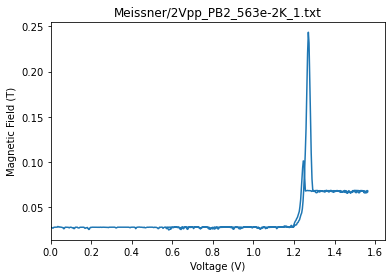

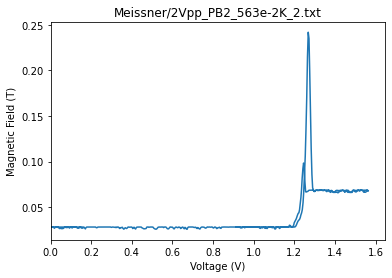

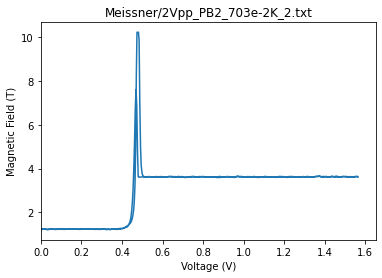

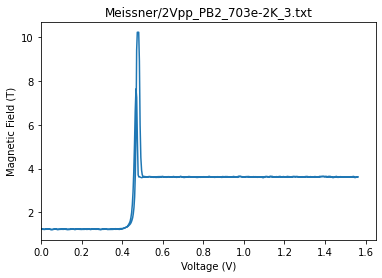

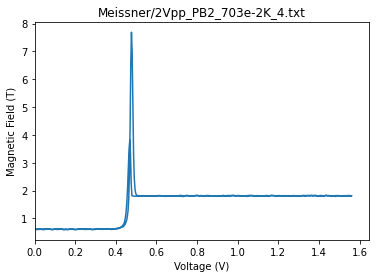

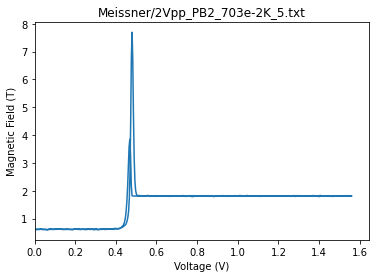

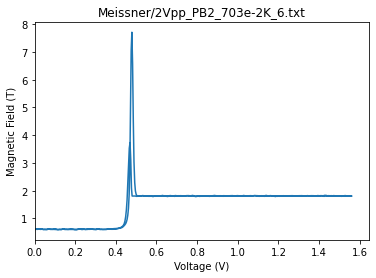

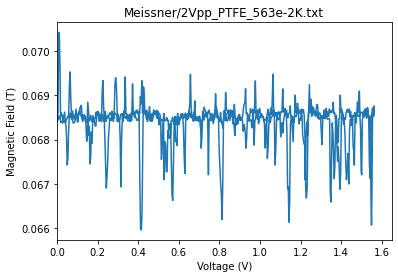

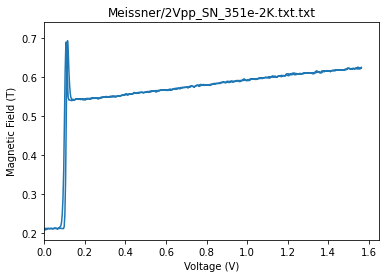

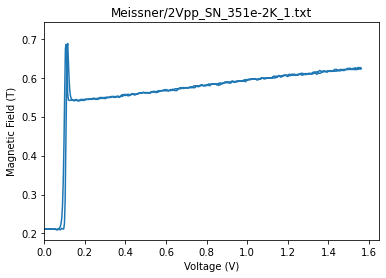

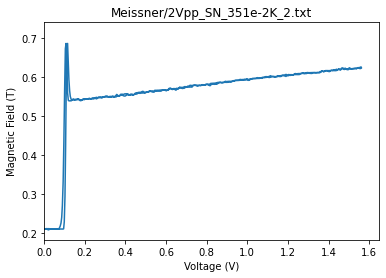

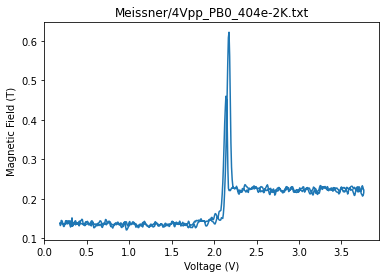

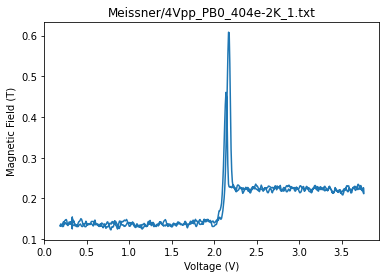

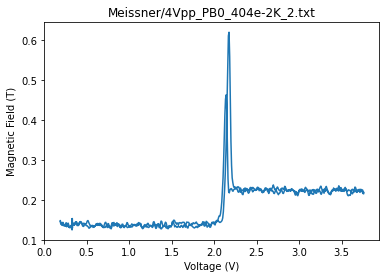

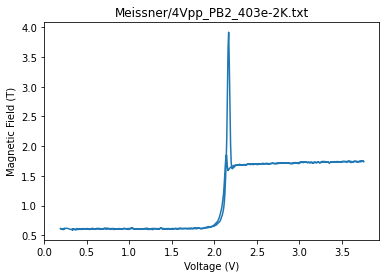

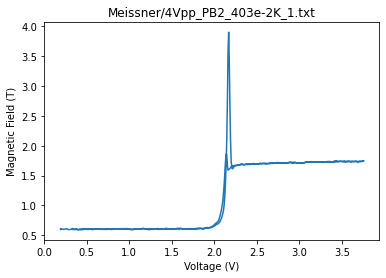

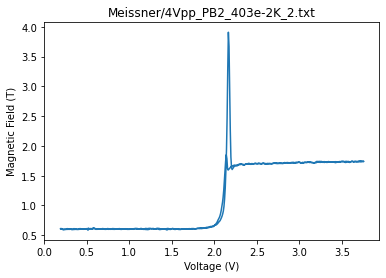

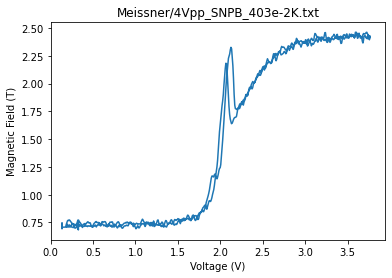

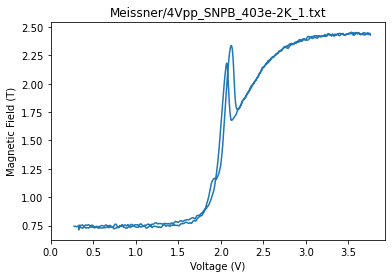

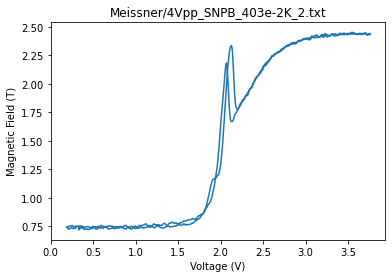

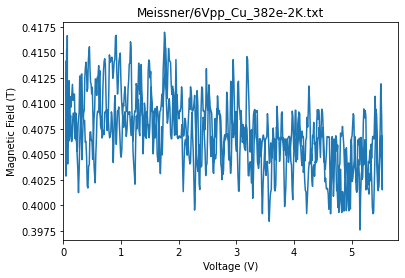

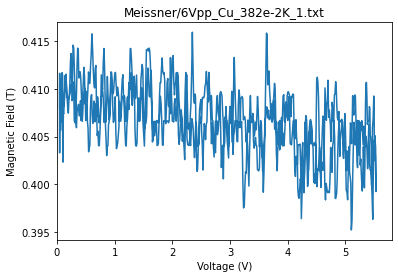

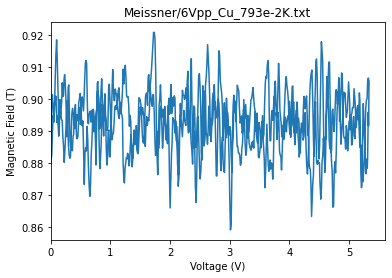

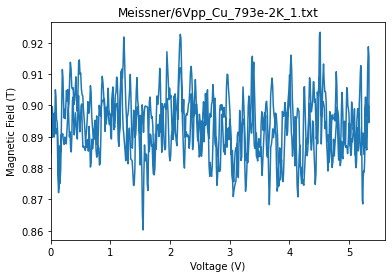

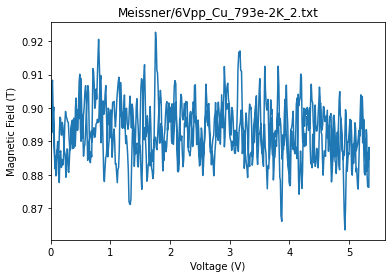

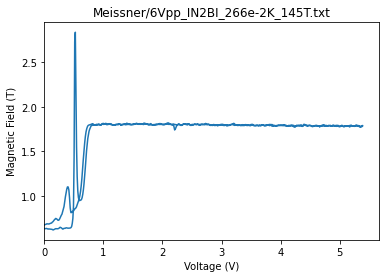

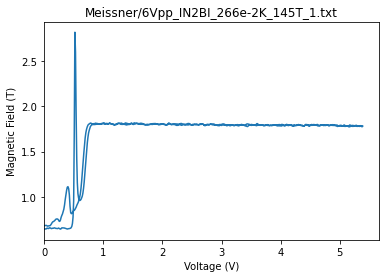

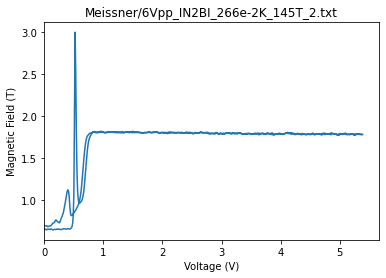

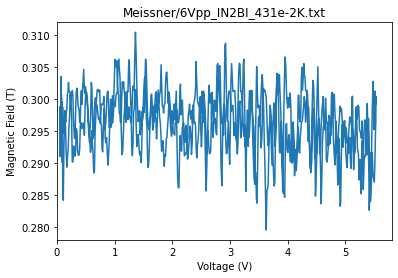

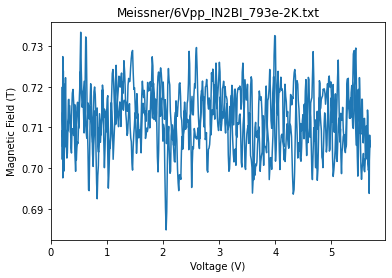

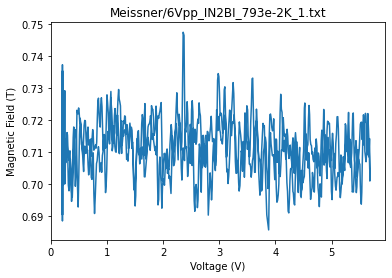

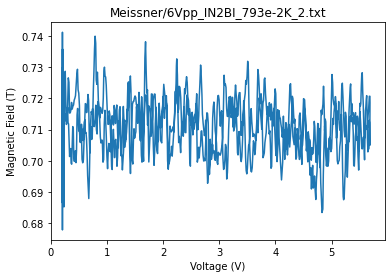

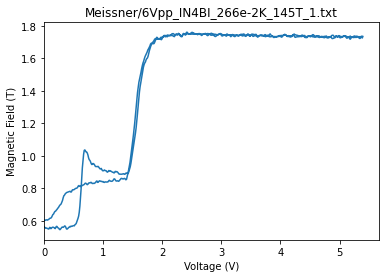

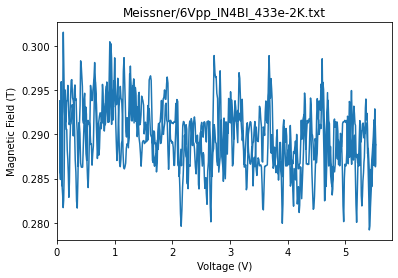

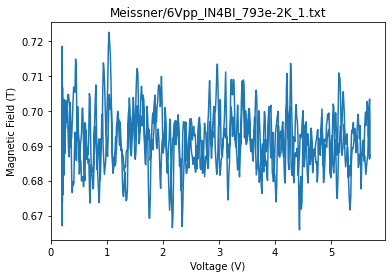

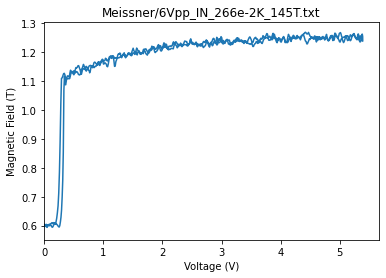

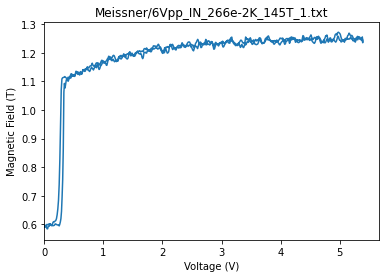

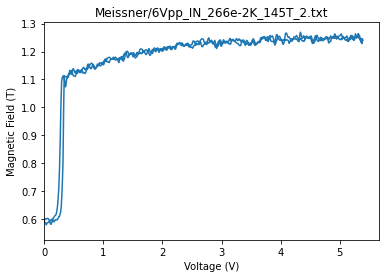

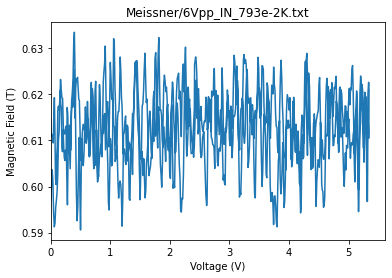

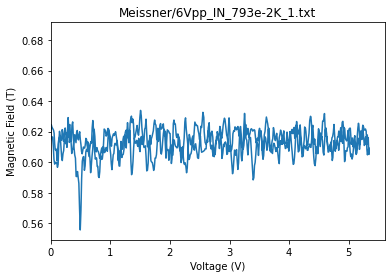

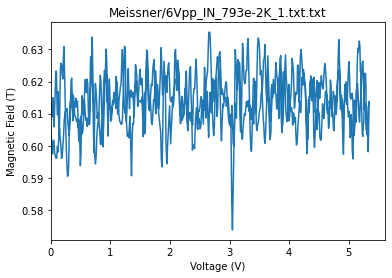

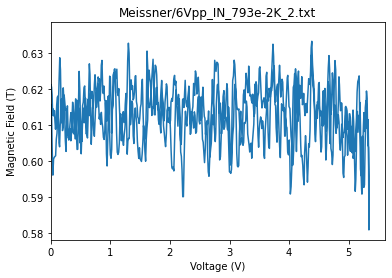

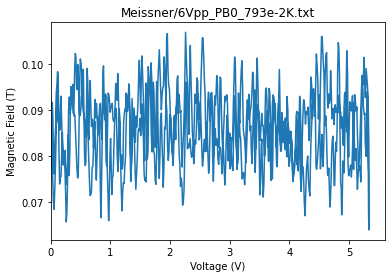

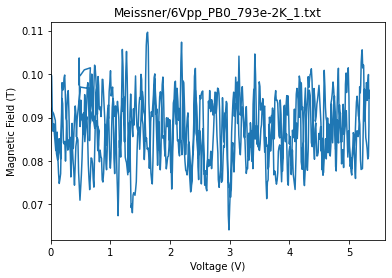

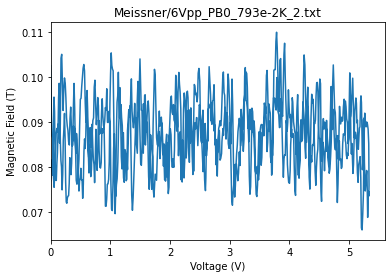

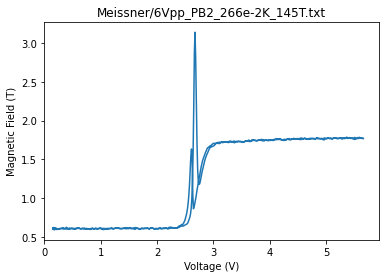

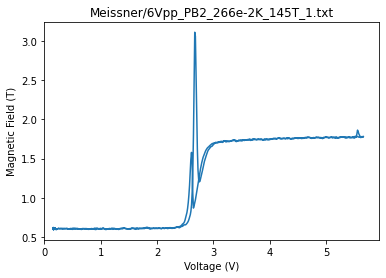

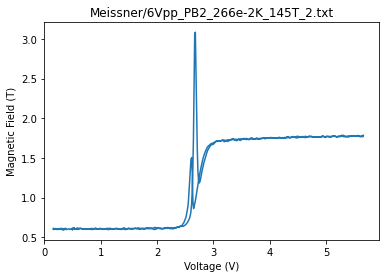

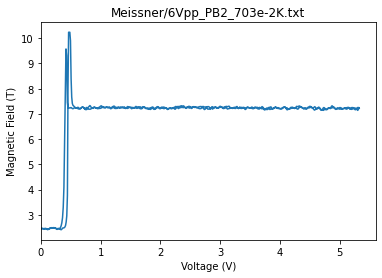

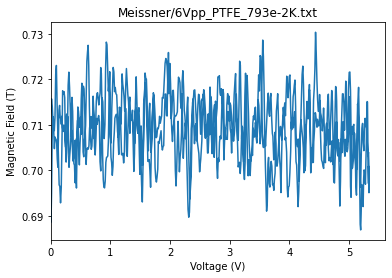

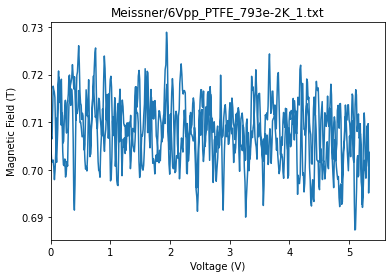

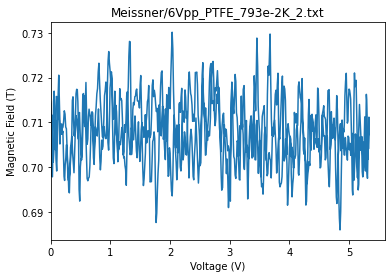

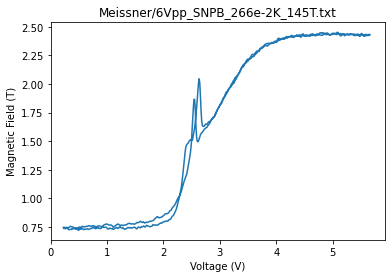

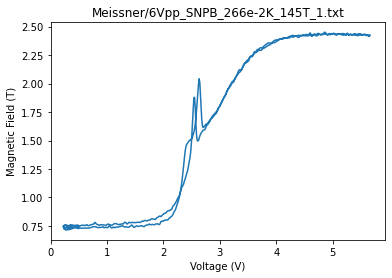

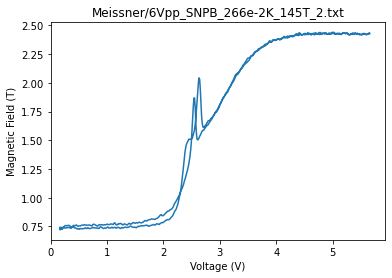

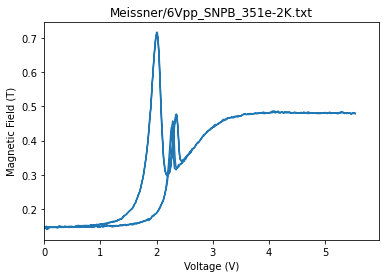

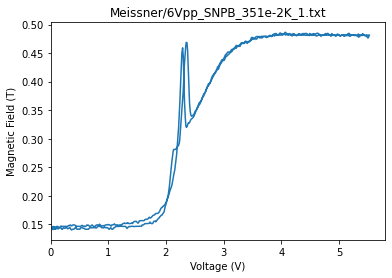

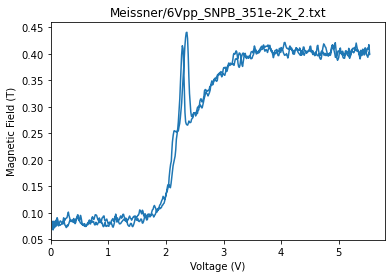

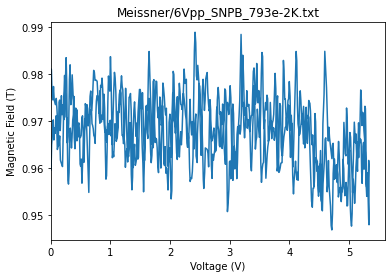

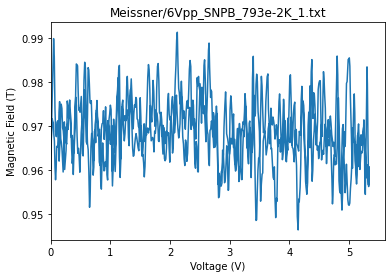

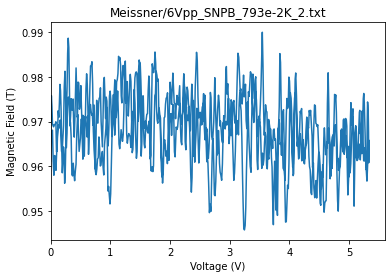

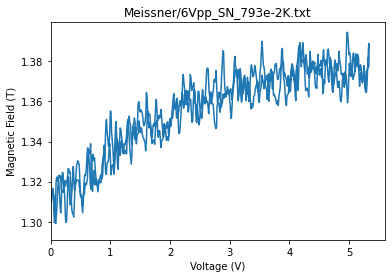

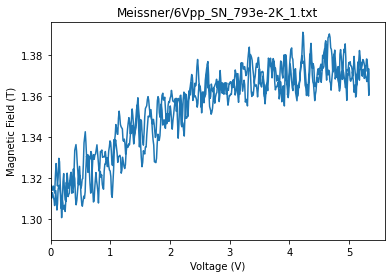

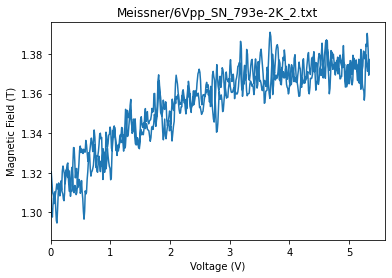

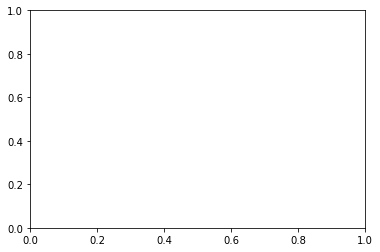

In [57]:
#determinr HC at zero temperature and Tc by doing a fit 
files = glob.glob('Meissner/*.txt')
files.sort()

PB0 = [[], []]
PB1 = [[], []]

IN = [[], []]
PB2 = [[], []]
SNPB = [[], []]
Cu = [[], []]
PTFE = [[], []]
IN2BI = [[], []]
IN4BI = [[], []]
SN = [[], []]

all_samples = {"IN": IN, "PB2": PB2, "SNPB": SNPB, "Cu": Cu, "PTFE": PTFE, "IN2BI": IN2BI, "IN4BI": IN4BI, "SN": SN, "PB0": PB0, "PB1":PB1}

def find_nth(haystack, needle, n):
    start = haystack.find(needle)
    while start >= 0 and n > 1:
        start = haystack.find(needle, start+len(needle))
        n -= 1
    return start

for file in files:
    df = pd.read_table(file,names = ['v0','v1','v2','v3'])
    plt.figure()
    plt.plot(df['v0'],df['v1'],label=file)
    plt.xlabel("Voltage (V)")
    plt.ylabel("Magnetic Field (T)")
    plt.xlim(left= 0)
    plt.title(file)
    
    peak_positions = find_peaks(df["v1"], height = .03, threshold = .01)
    print(file)
    #print(type(peak_positions))
    print(peak_positions)
    
    #if len(peak_positions) =! 0:
        #for i in peak_positions: 
            #print(i)
            #plt.plot(df['v0'][i], df['v1'][i], "ro")
    #sample_critical_B = df["v1"].max()
    
    index1_temp = find_nth(file, "_", 2) + 1
    index2_temp = find_nth(file, "K", 1)
    
    
    index1_name = find_nth(file, "_", 1) +1 
    index2_name = find_nth(file, "_", 2)
    
    sample_temperature = file[index1_temp:index2_temp]
    sample_name = file[index1_name: index2_name]
    
    sample_temperature = float(sample_temperature)
    all_samples[sample_name][0].append(sample_temperature)
    #all_samples[sample_name][1].append(sample_critical_B)

    
    #plt.legend()
#plt.close("all")

#print(len(all_samples))
for sample in all_samples: #add some error bars 
    #print(sample)
    plt.figure()
    plt.plot(all_samples[sample][0], all_samples[sample][1], "o") 
    plt.xlabel("Temperature (K)")
    plt.ylabel("Critical Magnetic Field (T)")
    plt.title(sample)

In [ ]:
plt.figure()
df = pd.read_table(file,names = ['v0','v1','v2','v3'])
plt.plot(df['v0'],df['v1'],label=file)

In [ ]:
files

In [ ]:
plt.figure()
files = glob.glob('Meissner/6Vpp*PB2*')
for file in files:
    df = pd.read_table(file,names = ['v0','v1','v2','v3'])
    plt.plot(df['v0'],df['v1'])